# Compute  PCA : Method 1 : Clustering with Affinity Propagation

- use PCA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/12/29
- last update : 2022/12/30

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from mpl_toolkits.mplot3d import axes3d  

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [4]:
from astropy.io import fits
import copy

In [5]:
filename = "datatools/pcamethod1_SL_eigenvectorandcoeff.fits"
hdu = fits.open(filename)

In [6]:
hdu.info()

Filename: datatools/pcamethod1_SL_eigenvectorandcoeff.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (6362, 553)   float64   
  1                1 ImageHDU         8   (10, 550)   float64   
  2                1 ImageHDU         8   (6361, 10)   float64   


In [7]:
data1=hdu[0].data
hdr1 = hdu[0].header
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6362                                                  
NAXIS2  =                  553                                                  
EXTEND  =                    T                                                  
DATAWLS = 'data[0,1:]'                                                          
DATALLAV= 'data[1,1:]'                                                          
DATALLST= 'data[2,1:]'                                                          
DATAFL  = 'data[3:,1:]'                                                         
DATANUM = 'data[3:,0]'                                                          
COMMENT Spectra of StarLight                                                    

In [8]:
data2=hdu[1].data
hdr2 = hdu[1].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =                  550                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 spectra coefficients                                       

In [9]:
data3=hdu[2].data
hdr2 = hdu[2].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6361                                                  
NAXIS2  =                   10                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 Eigen Vectors                                              

In [10]:
NSED = data1.shape[0]-3
NWL = data1.shape[1]-1

In [11]:
wavelengths = data1[0,1:] 
flambdas_average = data1[1,1:] 
flambdas_std = data1[2,1:] 
spec = data1[3:,1:] 
all_numbers = data1[3:,0] 

In [12]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_52724/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

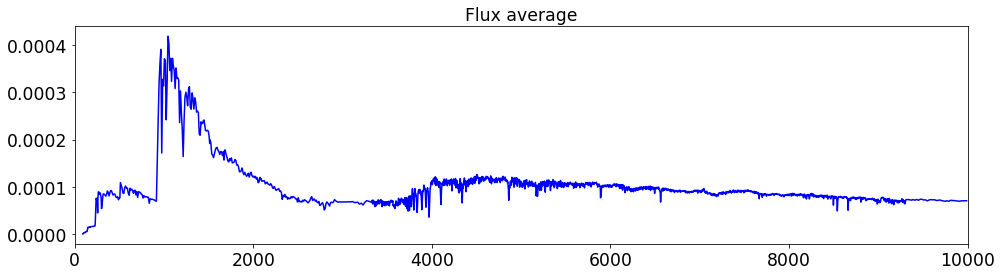

In [13]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

In [14]:
spec.shape

(550, 6361)

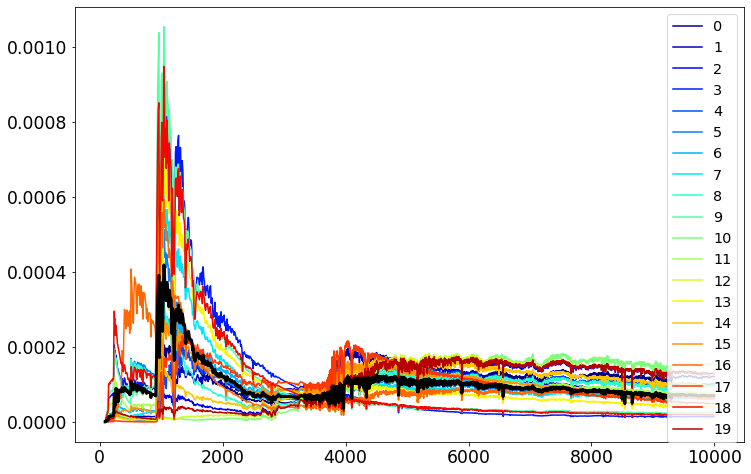

In [15]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

# Clustering

https://scikit-learn.org/stable/modules/clustering.html

## Clustering from PCA coefficients

In [16]:
#X = copy.deepcopy(data2[:,:5])
X = copy.deepcopy(data2)

In [17]:
X.shape

(550, 10)

In [18]:
af = AffinityPropagation(preference=None, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
#    "Adjusted Mutual Information: %0.3f"
#    % metrics.adjusted_mutual_info_score(labels_true, labels)
#)
#print(
#    "Silhouette Coefficient: %0.3f"
#    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
#)

Estimated number of clusters: 20


In [19]:
print("centroids: ", af.cluster_centers_)
print("labels: ", af.labels_)

centroids:  [[-6.40277901e-04 -1.04176723e-03  4.42214939e-04 -8.72242005e-05
  -1.03903363e-06 -3.70625213e-05  2.58428879e-05 -2.49321784e-05
  -4.65297533e-06 -3.95438653e-05]
 [ 5.89586064e-03  9.15862041e-04  1.10431649e-04  1.17290541e-03
   4.76505442e-04 -3.46008072e-05 -2.29373527e-05 -6.18593342e-05
  -2.70549118e-05 -8.63911305e-06]
 [ 1.60518645e-03 -2.10081538e-03  9.89730893e-05 -8.93650336e-04
   6.57624098e-04  7.14946939e-05 -2.40628471e-04  7.56162047e-05
   4.63059226e-05  1.79751931e-05]
 [-2.14648724e-03 -2.04642587e-03  1.30130968e-03 -8.80742778e-05
   2.13647148e-04  2.15730849e-05  7.07327112e-05 -6.90768666e-05
   2.06996988e-05 -1.41269708e-05]
 [-5.07354534e-03  4.37925253e-04  7.04390766e-05  8.91021028e-05
  -5.91132942e-05 -1.20140517e-05  1.22247661e-05  4.05537253e-05
  -1.17024902e-05 -1.85596999e-05]
 [-3.12592940e-03  8.17648236e-04 -5.79951640e-04 -1.68842405e-04
  -1.20475843e-07 -1.00272972e-04  7.10901496e-05 -5.65485631e-06
  -1.95823044e-06 -3.

In [20]:
mydict = {i: np.where(af.labels_ == i)[0] for i in range(n_clusters_)}
#my_dict = {km.cluster_centers_[i, 0]: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

In [21]:
mydict

{0: array([  6,  15,  29,  32,  47,  56,  61,  67,  74, 119, 124, 130, 158,
        160, 161, 195, 202, 206, 243, 268, 277, 300, 319, 415, 418, 423,
        438, 454, 455, 460, 467, 501, 509, 539, 540]),
 1: array([ 27, 110, 122, 148, 152, 159, 227, 285, 289, 302, 306, 309, 311,
        313, 320, 322, 323, 331, 366, 373, 387, 391, 414, 429, 463, 470,
        473, 500, 512]),
 2: array([ 35,  40,  43,  49,  53,  54,  59, 118, 125, 168, 255, 291, 425,
        451, 504, 521]),
 3: array([  1,  17,  31,  41,  44,  60,  65,  88,  93,  96, 154, 191, 212,
        273, 378, 398]),
 4: array([ 12,  19,  21,  57,  63,  68,  78,  79,  80,  86,  87,  90,  94,
        100, 105, 106, 108, 133, 142, 144, 165, 180, 198, 223, 224, 229,
        233, 246, 252, 254, 259, 284, 304, 324, 326, 337, 357, 360, 385,
        393, 399, 405, 412, 424, 453, 465, 477, 479, 484, 488, 490, 496,
        499, 508, 514, 523, 546]),
 5: array([  0,  14,  66,  99, 102, 107, 167, 170, 187, 204, 218, 231, 234,
        260, 3

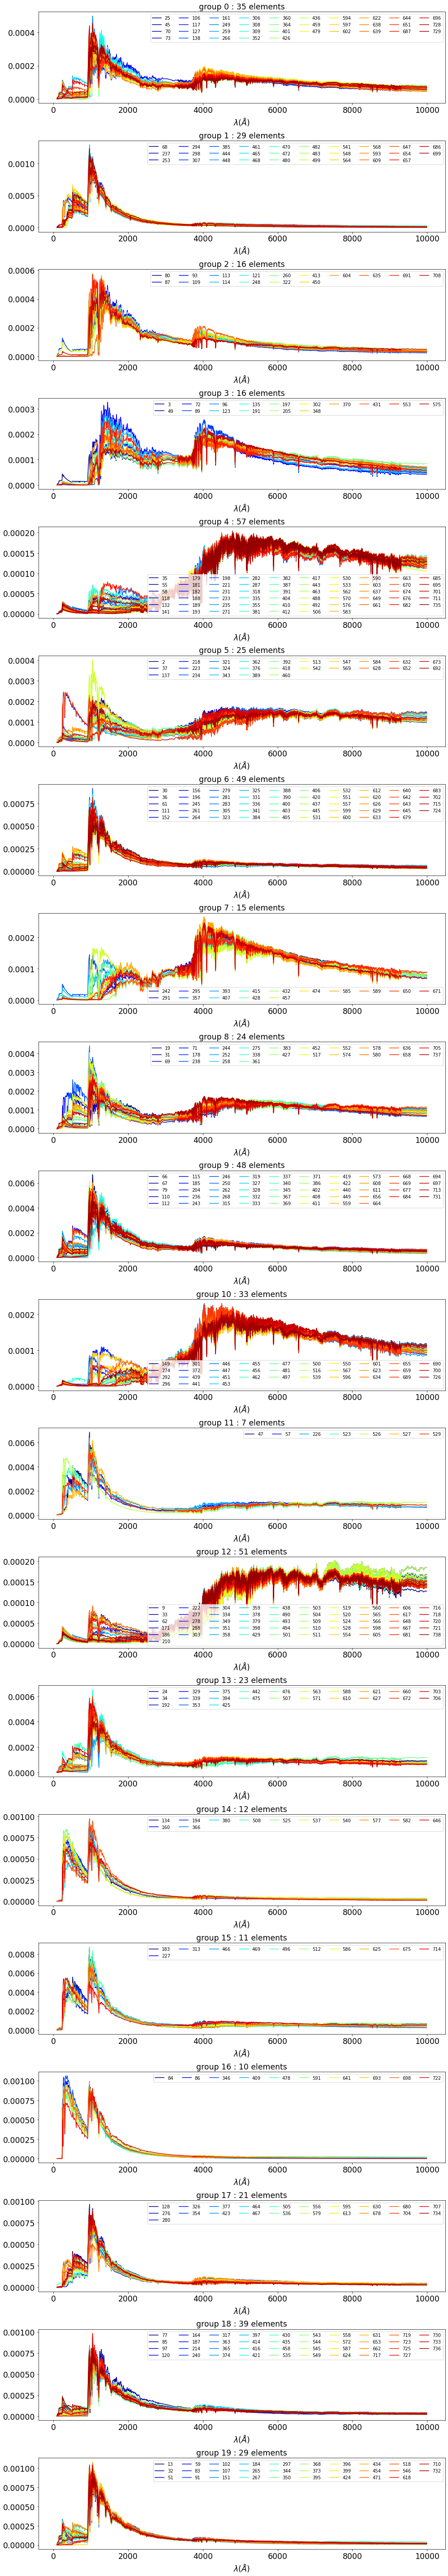

In [22]:
fig = plt.figure(figsize=(14, n_clusters_*4))

for icluster in range(n_clusters_):
    ax=fig.add_subplot(n_clusters_,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=str(the_label))
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
        
        
plt.tight_layout()
    


### Clustering from Spectra

In [23]:
X = copy.deepcopy(spec)

In [24]:
af = AffinityPropagation(preference=None, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 21


In [25]:
mydict = {i: np.where(af.labels_ == i)[0] for i in range(n_clusters_)}

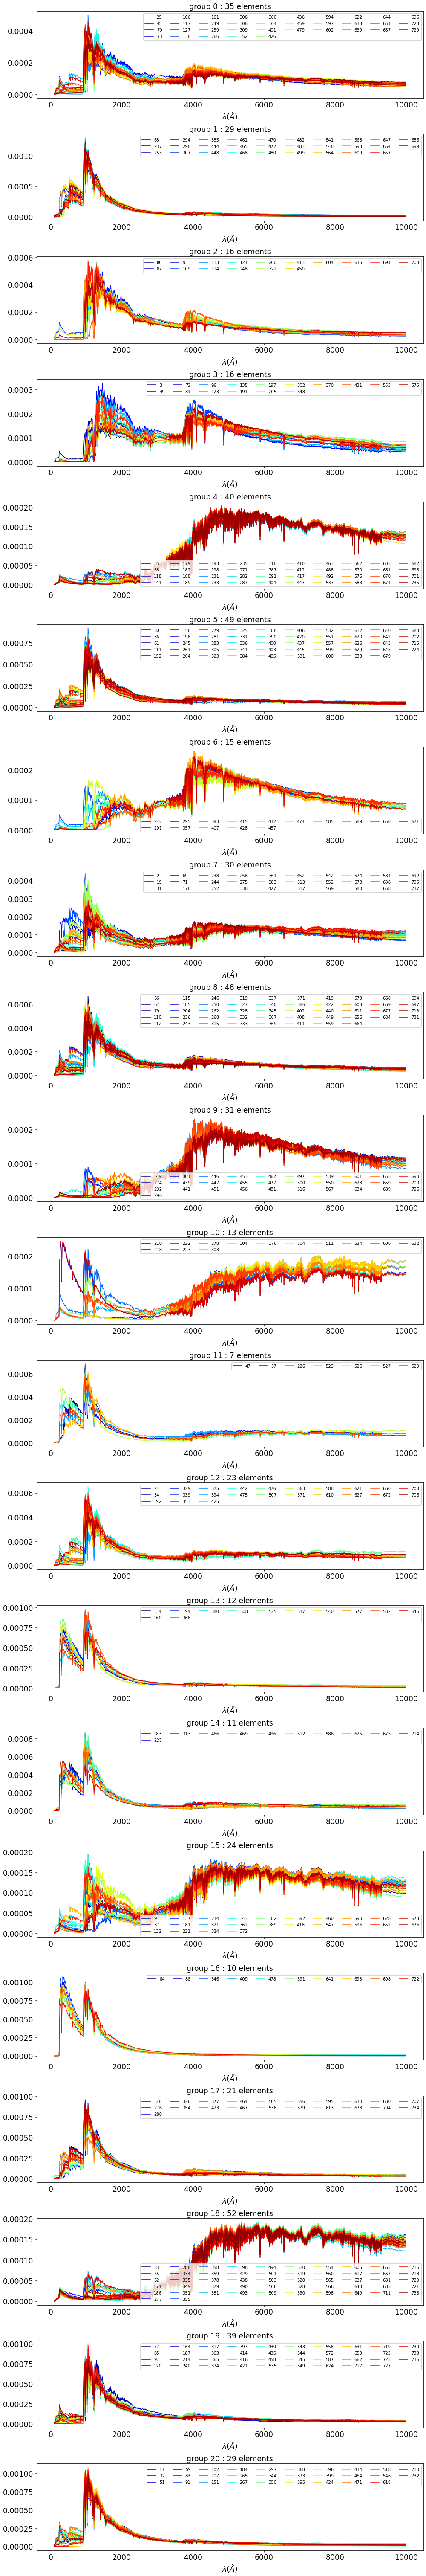

In [26]:
fig = plt.figure(figsize=(14, n_clusters_*4))

for icluster in range(n_clusters_):
    ax=fig.add_subplot(n_clusters_,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
        
        
plt.tight_layout()